# Project final (Ivan & Bertrand)

## Analyse exploratoire des Données 

### Chargement du dataset:

In [1]:
import pandas as pd
df_icu = pd.read_csv('data01.csv')
df_icu.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


### Identification de chaque type de variable:

In [2]:
df_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

### Nombre de valeurs manquantes par colonne en %

In [3]:
df_icu.isna().sum()/1177*100

group                        0.000000
ID                           0.000000
outcome                      0.084962
age                          0.000000
gendera                      0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Systolic blood pressure      1.359388
Diastolic blood pressure     1.359388
Respiratory rate             1.104503
temperature                  1.614274
SP O2                        1.104503
Urine output                 3.058624
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC                         0.000000
MCV         

### Dispertion de la variable à predire

Text(0.5, 1.0, 'l’histogramme de la variable outcome(1= death)')

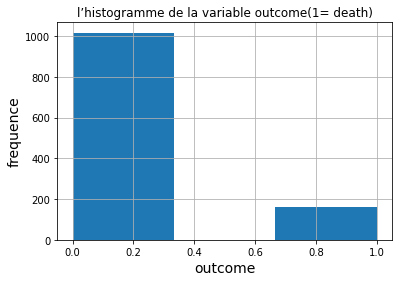

In [4]:
import seaborn as sns
from seaborn import set_theme
import matplotlib.pyplot as plt
plt.hist(df_icu['outcome'], bins=3, alpha=1)
plt.grid()
plt.xlabel("outcome", size=14)
plt.ylabel("frequence", size=14)
plt.title("l’histogramme de la variable outcome(1= death)")
#plt.savefig("histogram-age.png")

In [5]:
#!pip3 install impyute

In [ ]:
# Regarder ver le probleme de debalancement:
# Acuracy balance vers la classe dominante. (bias vers la dominance)
# techniques de balancement smote
# metriques f1, precission, recall, AUC

### Valeurs Aberrantes par colonne

In [6]:
Q1 = df_icu.quantile(0.25)
Q3 = df_icu.quantile(0.75)
IQR = Q3 - Q1

# ((nbaDF < (Q1 - 1.5 * IQR)) | (nbaDF > (Q3 + 1.5 * IQR))).sum()
print("En dessous de 1,5 * distance interquartile")
print((df_icu < (Q1 - 1.5 * IQR)).sum())
print("\nAu-dessus de 1,5 * distance interquartile")
print((df_icu > (Q3 + 1.5 * IQR)).sum())

En dessous de 1,5 * distance interquartile
group                        0
ID                           0
outcome                      0
age                          5
gendera                      0
BMI                          0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                   1
Systolic blood pressure      0
Diastolic blood pressure     2
Respiratory rate             0
temperature                  7
SP O2                       17
Urine output                 0
hematocrit                   0
RBC                          0
MCH                         41
MCHC                        13
MCV                         23
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                

In [12]:
df_icu.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [77]:
pd.set_option('display.max_columns', None)
df_values = df_icu.describe().loc[['min','max']]
df_values

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
min,1.0,100213.0,0.0,19.0,1.0,13.346801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.000000,75.0,24.736842,11.137931,33.250000,75.916667,0.0,20.311111,2.030,18.125000,27.825000,62.600000,12.088889,0.10,9.571429,5.0,0.1,0.966667,10.100000,0.871429,50.0,8.0,0.266667,5.357143,66.666667,3.000000,114.666667,6.70,80.266667,6.636364,1.400000,7.09,12.857143,0.500000,18.75,15.0
max,2.0,199952.0,1.0,99.0,2.0,104.970366,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,135.708333,203.0,107.000000,40.900000,39.132478,100.000000,8820.0,55.425000,6.575,40.314286,37.011111,116.714286,29.050000,64.75,1028.200000,98.0,8.8,83.500000,71.271429,8.342857,118928.0,42987.5,15.527273,161.750000,414.100000,6.566667,154.736842,10.95,122.526316,25.500000,4.072727,7.58,47.666667,8.333333,98.60,75.0


In [80]:
names = df_values.columns.values.tolist()
values = [list(i) for i in zip(*df_values.values)]

In [81]:
values

[[1.0, 2.0],
 [100213.0, 199952.0],
 [0.0, 1.0],
 [19.0, 99.0],
 [1.0, 2.0],
 [13.34680089, 104.970366],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [36.0, 135.7083333],
 [75.0, 203.0],
 [24.73684211, 107.0],
 [11.13793103, 40.9],
 [33.25, 39.13247842],
 [75.91666667, 100.0],
 [0.0, 8820.0],
 [20.31111111, 55.425],
 [2.03, 6.575],
 [18.125, 40.31428571],
 [27.825, 37.01111111],
 [62.6, 116.7142857],
 [12.08888889, 29.05],
 [0.1, 64.75],
 [9.571428571, 1028.2],
 [5.0, 98.0],
 [0.1, 8.8],
 [0.966666667, 83.5],
 [10.1, 71.27142857],
 [0.871428571, 8.342857143],
 [50.0, 118928.0],
 [8.0, 42987.5],
 [0.266666667, 15.52727273],
 [5.357142857, 161.75],
 [66.66666667, 414.1],
 [3.0, 6.566666667],
 [114.6666667, 154.7368421],
 [6.7, 10.95],
 [80.26666667, 122.5263158],
 [6.636363636, 25.5],
 [1.4, 4.072727273],
 [7.09, 7.58],
 [12.85714286, 47.66666667],
 [0.5, 8.333333333],
 [18.75, 98.6],
 [15.0, 75.0]]

In [82]:
i=0
for value in values:
    value.append(names[i])
    i = i+1
values

[[1.0, 2.0, 'group'],
 [100213.0, 199952.0, 'ID'],
 [0.0, 1.0, 'outcome'],
 [19.0, 99.0, 'age'],
 [1.0, 2.0, 'gendera'],
 [13.34680089, 104.970366, 'BMI'],
 [0.0, 1.0, 'hypertensive'],
 [0.0, 1.0, 'atrialfibrillation'],
 [0.0, 1.0, 'CHD with no MI'],
 [0.0, 1.0, 'diabetes'],
 [0.0, 1.0, 'deficiencyanemias'],
 [0.0, 1.0, 'depression'],
 [0.0, 1.0, 'Hyperlipemia'],
 [0.0, 1.0, 'Renal failure'],
 [0.0, 1.0, 'COPD'],
 [36.0, 135.7083333, 'heart rate'],
 [75.0, 203.0, 'Systolic blood pressure'],
 [24.73684211, 107.0, 'Diastolic blood pressure'],
 [11.13793103, 40.9, 'Respiratory rate'],
 [33.25, 39.13247842, 'temperature'],
 [75.91666667, 100.0, 'SP O2'],
 [0.0, 8820.0, 'Urine output'],
 [20.31111111, 55.425, 'hematocrit'],
 [2.03, 6.575, 'RBC'],
 [18.125, 40.31428571, 'MCH'],
 [27.825, 37.01111111, 'MCHC'],
 [62.6, 116.7142857, 'MCV'],
 [12.08888889, 29.05, 'RDW'],
 [0.1, 64.75, 'Leucocyte'],
 [9.571428571, 1028.2, 'Platelets'],
 [5.0, 98.0, 'Neutrophils'],
 [0.1, 8.8, 'Basophils'],
 [0.96

In [69]:
names

['group',
 'ID',
 'outcome',
 'age',
 'gendera',
 'BMI',
 'hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'hematocrit',
 'RBC',
 'MCH',
 'MCHC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine kinase',
 'Creatinine',
 'Urea nitrogen',
 'glucose',
 'Blood potassium',
 'Blood sodium',
 'Blood calcium',
 'Chloride',
 'Anion gap',
 'Magnesium ion',
 'PH',
 'Bicarbonate',
 'Lactic acid',
 'PCO2',
 'EF']

In [83]:
a = [[19.0, 99.0, 'age'],
 [1.0, 2.0, 'gendera'],
 [13.34680089, 104.970366, 'BMI'],
 [0.0, 1.0, 'hypertensive'],
 [0.0, 1.0, 'atrialfibrillation'],
 [0.0, 1.0, 'CHD with no MI'],
 [0.0, 1.0, 'diabetes'],
 [0.0, 1.0, 'deficiencyanemias'],
 [0.0, 1.0, 'depression'],
 [0.0, 1.0, 'Hyperlipemia'],
 [0.0, 1.0, 'Renal failure'],
 [0.0, 1.0, 'COPD'],
 [36.0, 135.7083333, 'heart rate'],
 [75.0, 203.0, 'Systolic blood pressure'],
 [24.73684211, 107.0, 'Diastolic blood pressure'],
 [11.13793103, 40.9, 'Respiratory rate'],
 [33.25, 39.13247842, 'temperature']]

b = [[75.91666667, 100.0, 'SP O2'],
 [0.0, 8820.0, 'Urine output'],
 [20.31111111, 55.425, 'hematocrit'],
 [2.03, 6.575, 'RBC'],
 [18.125, 40.31428571, 'MCH'],
 [27.825, 37.01111111, 'MCHC'],
 [62.6, 116.7142857, 'MCV'],
 [12.08888889, 29.05, 'RDW'],
 [0.1, 64.75, 'Leucocyte'],
 [9.571428571, 1028.2, 'Platelets'],
 [5.0, 98.0, 'Neutrophils'],
 [0.1, 8.8, 'Basophils'],
 [0.966666667, 83.5, 'Lymphocyte'],
 [10.1, 71.27142857, 'PT'],
 [0.871428571, 8.342857143, 'INR'],
 [50.0, 118928.0, 'NT-proBNP'],
 [8.0, 42987.5, 'Creatine kinase'],
 [0.266666667, 15.52727273, 'Creatinine']]

c= [[5.357142857, 161.75, 'Urea nitrogen'],
 [66.66666667, 414.1, 'glucose'],
 [3.0, 6.566666667, 'Blood potassium'],
 [114.6666667, 154.7368421, 'Blood sodium'],
 [6.7, 10.95, 'Blood calcium'],
 [80.26666667, 122.5263158, 'Chloride'],
 [6.636363636, 25.5, 'Anion gap'],
 [1.4, 4.072727273, 'Magnesium ion'],
 [7.09, 7.58, 'PH'],
 [12.85714286, 47.66666667, 'Bicarbonate'],
 [0.5, 8.333333333, 'Lactic acid'],
 [18.75, 98.6, 'PCO2'],
 [15.0, 75.0, 'EF']]

In [18]:
variables_binaires = []
for col in df_icu:
    values = df_icu[col].unique()
    if len(values) < 10:
        print("<->"*20, "\n", col, '\n',values, "\n")
        variables_binaires.append(col)
print(variables_binaires)

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 group 
 [1 2] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 outcome 
 [ 0.  1. nan] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 gendera 
 [1 2] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 hypertensive 
 [0 1] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 atrialfibrillation 
 [0 1] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 CHD with no MI 
 [0 1] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 diabetes 
 [1 0] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 deficiencyanemias 
 [1 0] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 depression 
 [0 1] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 Hyperlipemia 
 [1 0] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-> 
 Renal failure 
 [1 0] 

<-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><-><

In [7]:
import seaborn as sns
from seaborn import set_theme
import matplotlib as plt

array([[<AxesSubplot:title={'center':'group'}>,
        <AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'outcome'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gendera'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'hypertensive'}>],
       [<AxesSubplot:title={'center':'atrialfibrillation'}>,
        <AxesSubplot:title={'center':'CHD with no MI'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'deficiencyanemias'}>,
        <AxesSubplot:title={'center':'depression'}>,
        <AxesSubplot:title={'center':'Hyperlipemia'}>,
        <AxesSubplot:title={'center':'Renal failure'}>],
       [<AxesSubplot:title={'center':'COPD'}>,
        <AxesSubplot:title={'center':'heart rate'}>,
        <AxesSubplot:title={'center':'Systolic blood pressure'}>,
        <AxesSubplot:title={'center':'Diastolic blood pressure'}>,
        <AxesSubplot:title={'cen

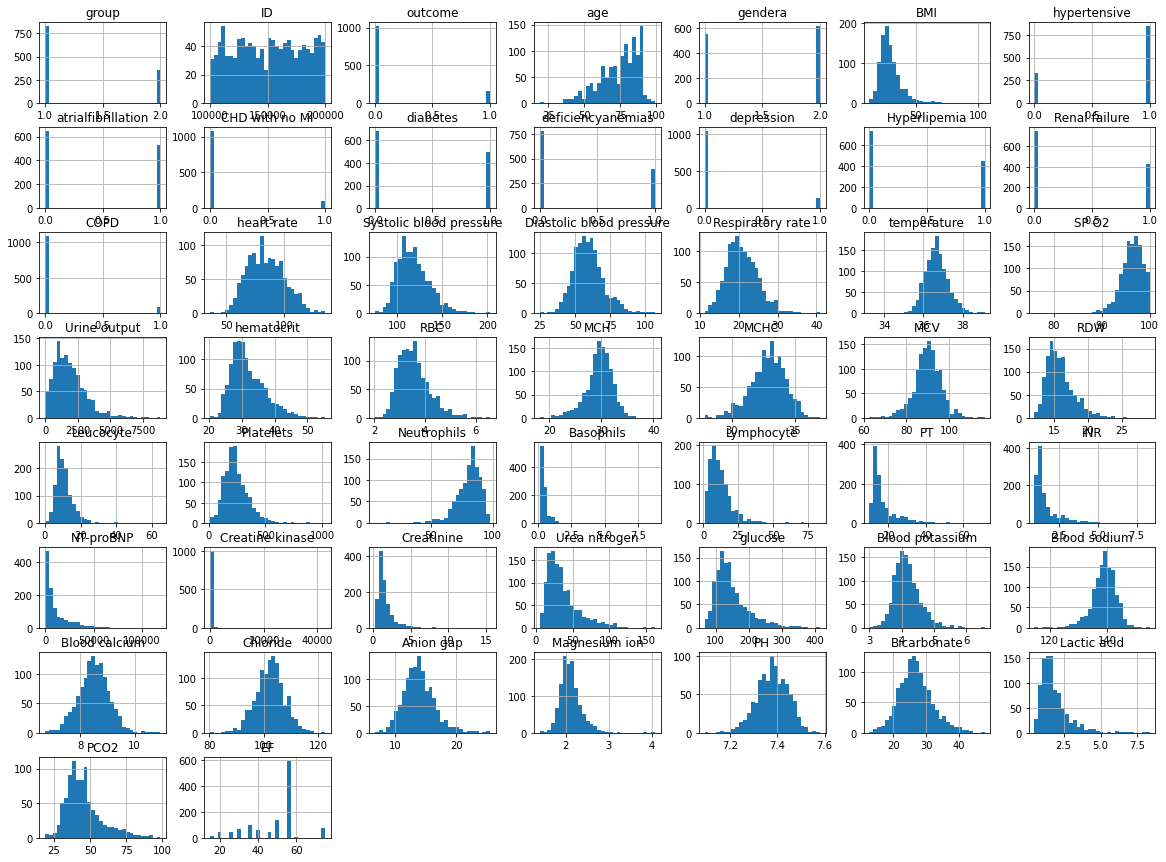

In [8]:
df_icu.hist(bins=30, figsize=(20, 15))

### Correlation entre les variables (Point Biserial Correlation: binary to linear correlation)

In [10]:
df_icu.corr()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
group,1.000000,0.001859,-0.024220,0.000077,0.011808,-0.041432,-0.052413,-0.002997,0.005263,0.025042,...,0.013817,0.040122,0.004602,0.008807,0.023504,-0.068841,0.003457,0.008740,0.006578,-0.012091
ID,0.001859,1.000000,0.040398,-0.026546,-0.030853,0.046694,-0.001704,-0.014781,0.035383,0.016410,...,-0.029445,-0.014066,-0.019014,-0.002319,-0.018554,-0.003802,-0.001622,0.009948,0.007350,0.015547
outcome,-0.024220,0.040398,1.000000,0.064510,-0.022690,-0.062086,-0.072441,0.100975,-0.014694,-0.049997,...,-0.066366,-0.184071,0.059834,0.229676,0.074033,-0.150611,-0.222650,0.229695,-0.049517,-0.024138
age,0.000077,-0.026546,0.064510,1.000000,0.081705,-0.384185,0.177060,0.291003,0.037594,-0.089103,...,0.104325,-0.009952,0.138015,-0.004426,0.088315,0.109494,-0.061130,0.006279,-0.127332,0.054400
gendera,0.011808,-0.030853,-0.022690,0.081705,1.000000,0.024556,0.008776,-0.036957,-0.079159,-0.035943,...,0.024527,0.061217,0.003008,-0.048100,-0.033931,-0.075880,0.036389,0.008586,0.085396,0.171936
BMI,-0.041432,0.046694,-0.062086,-0.384185,0.024556,1.000000,-0.032086,-0.118993,-0.063444,0.155664,...,0.050984,0.095782,-0.187950,-0.123465,0.017540,-0.128718,0.290148,-0.094095,0.347994,0.059470
hypertensive,-0.052413,-0.001704,-0.072441,0.177060,0.008776,-0.032086,1.000000,0.006757,0.010040,0.129649,...,0.033276,0.080089,-0.018294,0.067535,0.000580,0.023865,0.011035,-0.021776,-0.008208,0.012697
atrialfibrillation,-0.002997,-0.014781,0.100975,0.291003,-0.036957,-0.118993,0.006757,1.000000,-0.003449,-0.013032,...,-0.026506,0.019478,0.023312,0.049712,0.067448,0.047849,-0.071813,0.048939,-0.102525,0.011168
CHD with no MI,0.005263,0.035383,-0.014694,0.037594,-0.079159,-0.063444,0.010040,-0.003449,1.000000,0.008831,...,-0.071097,0.021364,-0.056855,0.024763,0.016926,0.072852,-0.009349,0.011653,-0.070955,-0.146272
diabetes,0.025042,0.016410,-0.049997,-0.089103,-0.035943,0.155664,0.129649,-0.013032,0.008831,1.000000,...,0.030363,0.077910,-0.028450,0.037494,0.017670,-0.022938,0.043975,0.034829,0.068339,-0.025660


## Valeur manquantes

In [25]:
# Drop any Nan from the outcome column
df_icu = df_icu.dropna(subset=['outcome'])

In [37]:
#divide between Y and X
y = df_icu.iloc[:,2:3]
X = df_icu.iloc[:,3:]

In [46]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(X)
X = imputer.transform(X)

In [47]:
imputed_X

array([[72.        ,  1.        , 37.58817943, ...,  0.5       ,
        40.        , 55.        ],
       [75.        ,  2.        , 28.3124741 , ...,  0.5       ,
        78.        , 55.        ],
       [83.        ,  2.        , 26.57263379, ...,  0.5       ,
        71.5       , 35.        ],
       ...,
       [85.        ,  2.        , 23.8917794 , ...,  1.6       ,
        43.        , 55.        ],
       [79.        ,  2.        , 35.28855354, ...,  1.6       ,
        43.        , 25.        ],
       [47.        ,  1.        , 23.12138413, ...,  1.6       ,
        43.        , 55.        ]])

## Train test

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2021)

## Scaling the data

In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

## Training basic random forest

In [50]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)
display(rfr.score(X_train_scaled, y_train))

<timed exec>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8832129006690005

CPU times: user 2.35 s, sys: 10.1 ms, total: 2.36 s
Wall time: 2.37 s


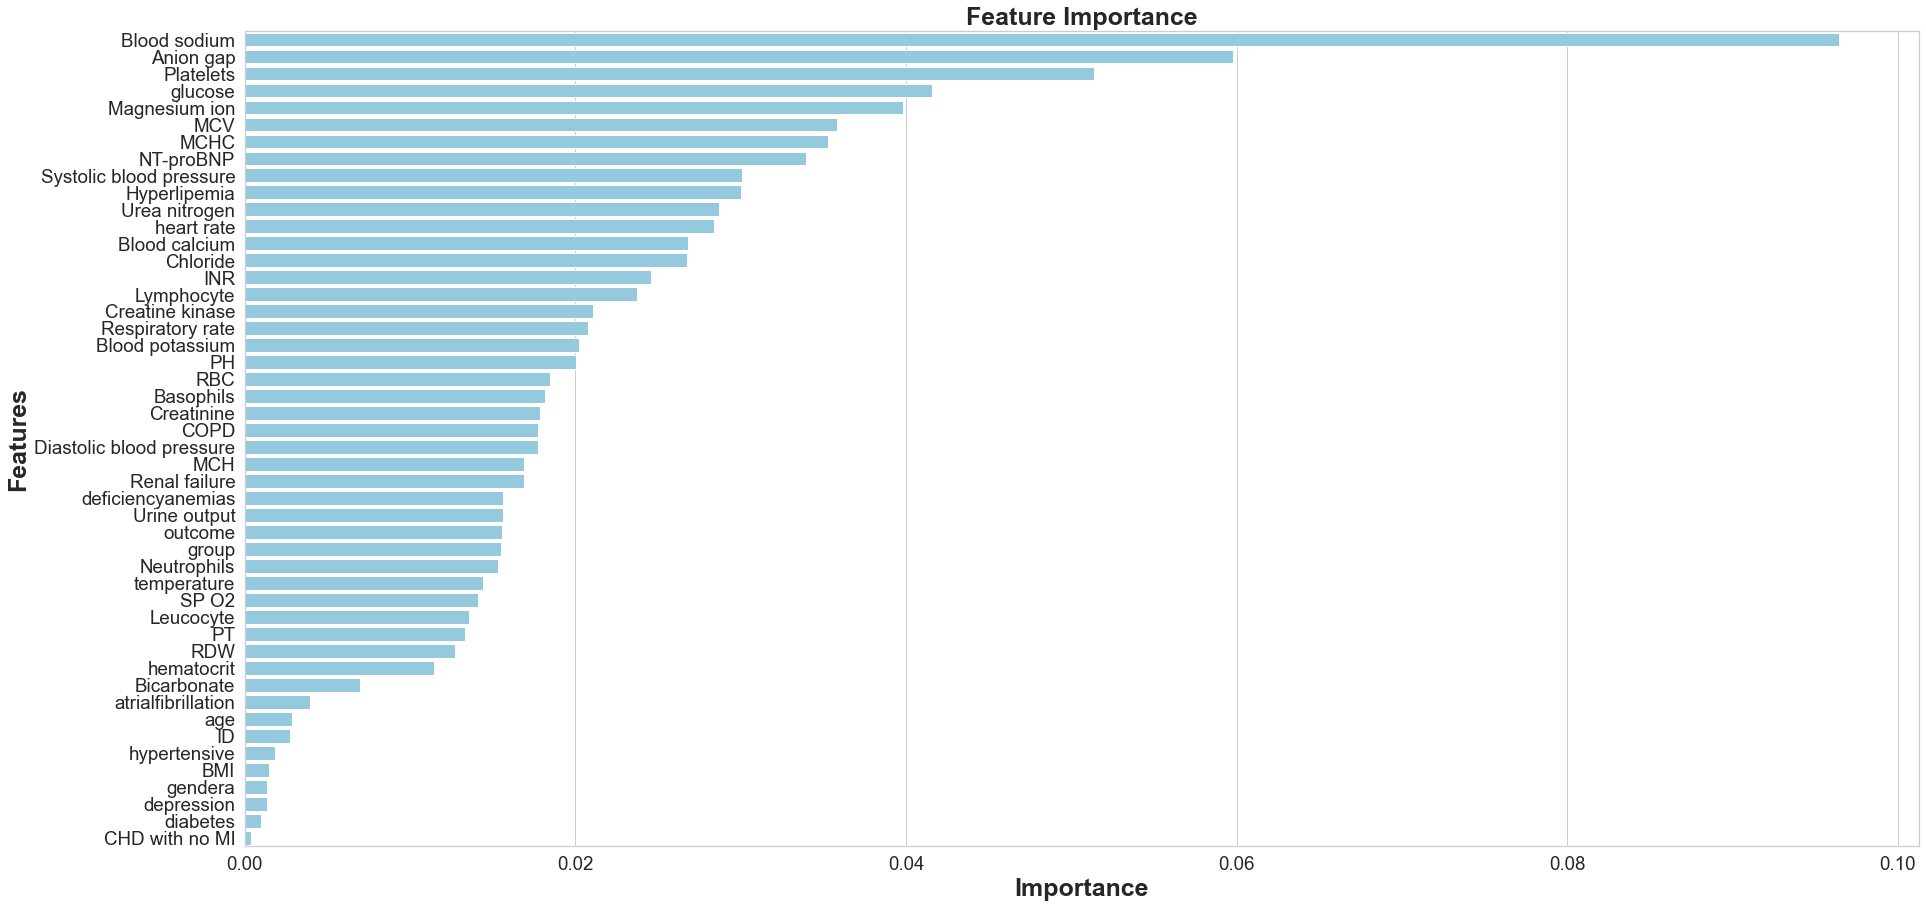

None

,Features,Gini-Importance
0,Blood sodium,0.096448
1,Anion gap,0.059798
2,Platelets,0.051377
3,glucose,0.041592
4,Magnesium ion,0.039842
5,MCV,0.035815
6,MCHC,0.035305
7,NT-proBNP,0.033923
8,Systolic blood pressure,0.030067
9,Hyperlipemia,0.030041


In [54]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
feats = {}
for feature, importance in zip(df_icu.columns, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)